In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats

Evaluate 
$$
 \int_{0}^{10} e^{-2 |x-5|} dx
$$

In [2]:
# define a function h(x) 
def h(x):
    return np.exp(-2 * np.abs(x-5))

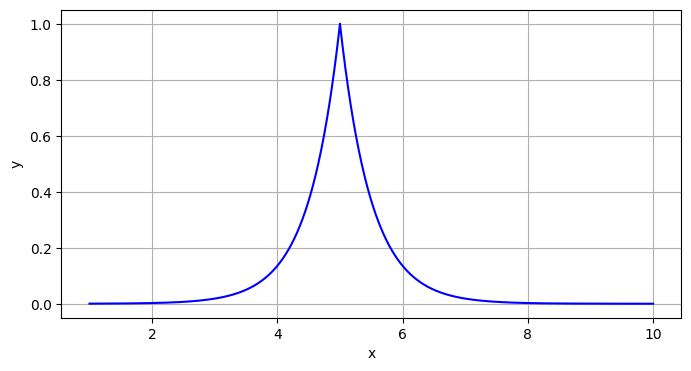

In [3]:
# plot h(x)
x = np.linspace(1,10,10000)
plt.figure(figsize=(8,4))
plt.plot(x,h(x),c='b', label='h(x)')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
# newmarical value of integration.
eval_int, _ = integrate.quad(h,0,10)
eval_int

0.9999546000702377

## Using Monte Carlo
now, we evaluate the integration using standred Monte Carlo

i.e.
$$
    \int_{0}^{10} h(x) dx = 10 \int_0^{10} h(x) \frac{1}{10} dx = E(10h(u)), \ u\sim U[0,1]
$$
By LLN, 
$$
    \frac{10}{N}\sum_{i=1}^{N} h(x_i) \to  E(10h(x)) 
$$

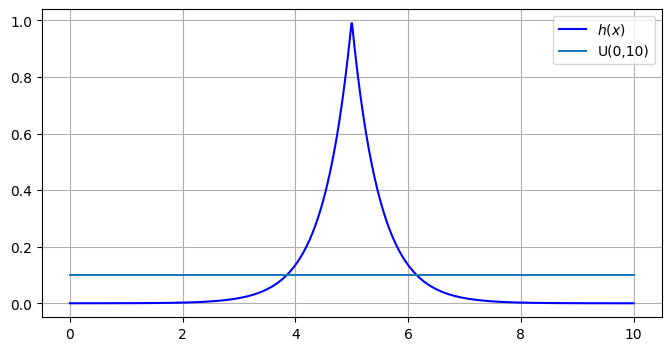

In [6]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(8,4))
# plot the function of random vairable x i.e. h(x)
plt.plot(x, h(x),c='b', label=r'$h(x)$')
# plot the uniform distribution that we would use to sample
plt.plot(x, stats.uniform(0, 10).pdf(x), label=r'U(0,10)')
plt.legend()
plt.grid()
plt.show()

In [7]:
def Monte_carlo_int(N):
    u = np.random.uniform(size=N) # U[0,1]
    u10 = 10*u #U[0,10]
    y = 10*h(u10)
    mean = np.mean(y)
    ver = np.var(y)
    return mean, ver

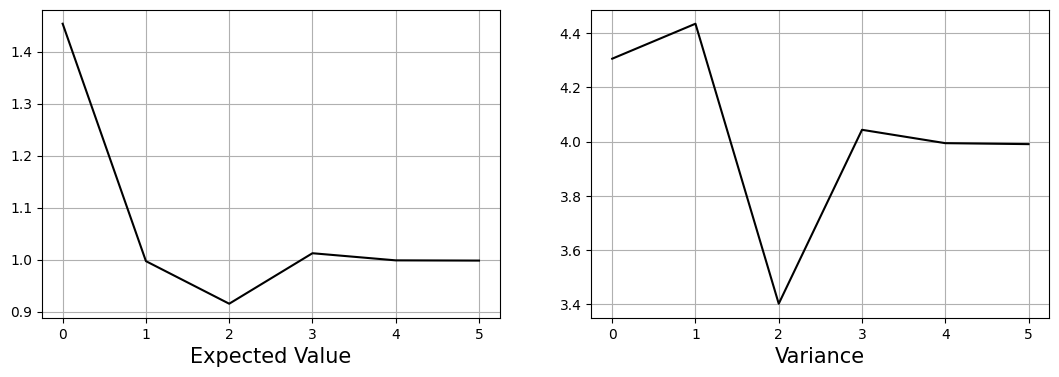

In [8]:
means = np.array([])
vars = np.array([])
sample_sizes = np.array([10**1,10**2,10**3,10**4,10**5,10**6])
for N in sample_sizes:
    mean, var = Monte_carlo_int(N)
    means = np.append(means, mean)
    vars = np.append(vars,var)

plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(means,c='black', label='Expected Value')
plt.xlabel("Expected Value",fontsize=15)
plt.grid()
plt.subplot(1,2,2)
plt.plot(vars,label="variance", color="black")
plt.xlabel("Variance", fontsize=15)
plt.grid()
plt.show()

In [9]:
print("Sample Size  Estimated Value I=0.9999  Variance")
for i in range(len(sample_sizes)):
    print(f"{sample_sizes[i]}  {means[i]}  {vars[i]}")

Sample Size  Estimated Value I=0.9999  Variance
10  1.4538176043759585  4.305657128992308
100  0.9970185302931275  4.434539764599577
1000  0.9150891430880602  3.4027452138427856
10000  1.0122374623829251  4.043654034956528
100000  0.9985272218386737  3.9944094557463448
1000000  0.9980918271662828  3.9908434365194596


# Using Importance sampling

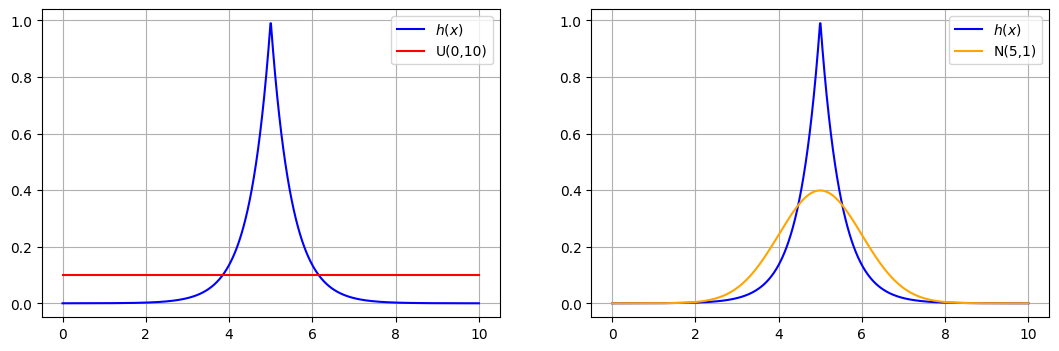

In [10]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
# plot the function of random vairable x i.e. h(x)
plt.plot(x, h(x),c='b', label=r'$h(x)$')
# plot the uniform distribution that we would use to sample
plt.plot(x, stats.uniform(0, 10).pdf(x),c='r', label=r'U(0,10)')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
# plot the function of random vairable x i.e. h(x)
plt.plot(x, h(x),c='b', label=r'$h(x)$')
# plot the uniform distribution that we would use to sample
plt.plot(x, stats.norm(5,1).pdf(x),c='orange' , label=r'N(5,1)')
plt.legend()
plt.grid()
plt.show()

Here, $W(x)=p(x)/q(x)$ where $p(x)$ is pdf of $U(0,10)$ and $q(x)$ is pdf of $N(5,1)$ 

In [11]:
def W(x):
    return stats.uniform(0,10).pdf(x) / stats.norm(5,1).pdf(x)

In [12]:
def Importence_sampleing_int(N):
    u = np.random.normal(5,1,size=N)
    Y = 10*h(u)*W(u)
    mean = np.mean(Y)
    var = np.var(Y)
    return mean, var

In [13]:
sample_sizes = np.array([10**1,10**2,10**3,10**4,10**5,10**6])
means = np.array([])
vars = np.array([])

for N in sample_sizes:
    mean, var = Importence_sampleing_int(N)
    means = np.append(means, mean)
    vars = np.append(vars, var)

In [14]:
print("Sample Size  Estimated Value(I=0.9999)  Variance")
for i in range(len(sample_sizes)):
    print(f"{sample_sizes[i]}  {means[i]}  {vars[i]}")

Sample Size  Estimated Value(I=0.9999)  Variance
10  0.7219639685371264  0.055417831912447334
100  1.0594292662726479  0.32567579209603237
1000  0.9998618360379389  0.3521592888255293
10000  1.0105012389420966  0.3762010220406077
100000  1.0023417816519928  0.3589322218143718
1000000  0.9993985460329633  0.35719385350563915


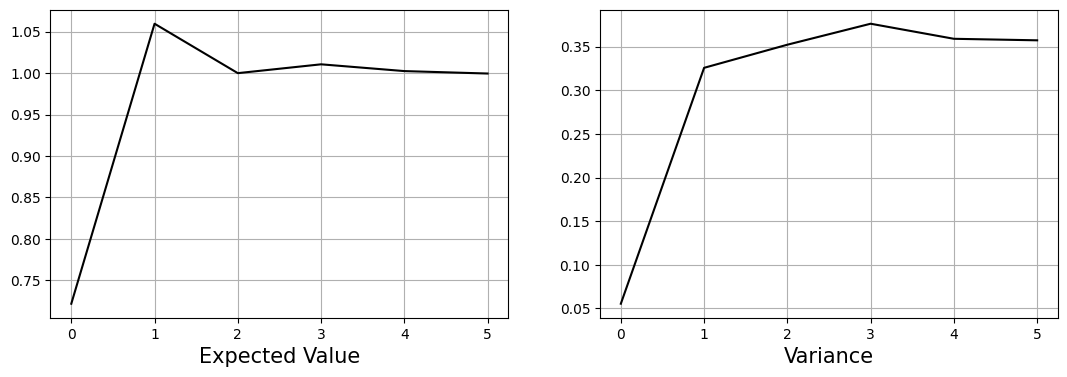

In [15]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(means,c="black",label='Expected Value')
plt.xlabel("Expected Value",fontsize=15)
plt.grid()
plt.subplot(1,2,2)
plt.plot(vars,label="variance", color="black")
plt.xlabel("Variance", fontsize=15)
plt.grid()
plt.show()